In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [3]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [4]:
# Create a DetectNet class using the Classifier

class DetectNet(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [5]:
# Instantiate a DetectNet model with pretrained weights
Detect = DetectNet()
Detect.load('./weights/DetectNet_DF')

In [6]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [7]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [8]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
!rmdir /s /q c:data\.ipynb_checkpoints

# Equivalent command in Unix (for Mac / Linux users)
# !rm -r /Users/mikhaillenko/DetectNet/DetectNet/data/.ipynb_checkpoints/

In [9]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 0s 52ms/step
Predicted likelihood: 0.5095
Actual label: 0
1/1 [==============================] - 0s 51ms/step

Correct prediction: False
(1, 256, 256, 3)


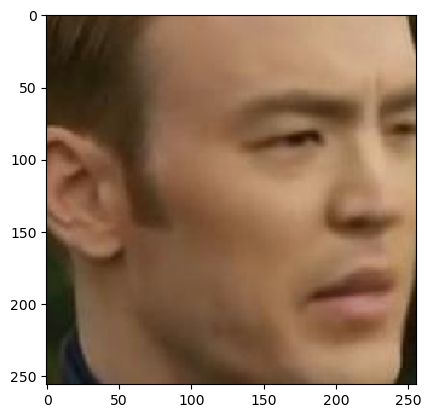

In [66]:
# Rendering image X with label y for DetectNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {Detect.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(Detect.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));
print(X.shape)#(1行,256*256組參數,3通道)

#print("x=",X[0][0])
#print("y=",y[0])


In [41]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [70]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = Detect.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif round(pred)!=y[0] and y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    elif round(pred)!=y[0] and y[0]==0:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)
    
    print("round",i)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 61ms/step
round 0
0  predictions completed.
1/1 [==============================] - 0s 58ms/step
round 1
1/1 [==============================] - 0s 58ms/step
round 2
1/1 [==============================] - 0s 59ms/step
round 3
1/1 [==============================] - 0s 59ms/step
round 4
1/1 [==============================] - 0s 58ms/step
round 5
1/1 [==============================] - 0s 60ms/step
round 6
1/1 [==============================] - 0s 61ms/step
round 7
1/1 [==============================] - 0s 67ms/step
round 8
1/1 [==============================] - 0s 60ms/step
round 9
1/1 [==============================] - 0s 63ms/step
round 10
1/1 [==============================] - 0s 59ms/step
round 11
1/1 [==============================] - 0s 58ms/step
round 12
1/1 [==============================] - 0s 59ms/step
round 13
1/1 [==============================] - 0s 59ms/step
round 14
1/1 [==============================] - 0s 62ms/step
round 15
1/1 [===

1/1 [==============================] - 0s 64ms/step
round 265
1/1 [==============================] - 0s 61ms/step
round 266
1/1 [==============================] - 0s 60ms/step
round 267
1/1 [==============================] - 0s 61ms/step
round 268
1/1 [==============================] - 0s 60ms/step
round 269
1/1 [==============================] - 0s 62ms/step
round 270
1/1 [==============================] - 0s 60ms/step
round 271
1/1 [==============================] - 0s 60ms/step
round 272
1/1 [==============================] - 0s 62ms/step
round 273
1/1 [==============================] - 0s 60ms/step
round 274
1/1 [==============================] - 0s 61ms/step
round 275
1/1 [==============================] - 0s 60ms/step
round 276
1/1 [==============================] - 0s 61ms/step
round 277
1/1 [==============================] - 0s 61ms/step
round 278
1/1 [==============================] - 0s 61ms/step
round 279
1/1 [==============================] - 0s 61ms/step
round 280
1/1 [===

1/1 [==============================] - 0s 63ms/step
round 529
1/1 [==============================] - 0s 62ms/step
round 530
1/1 [==============================] - 0s 61ms/step
round 531
1/1 [==============================] - 0s 62ms/step
round 532
1/1 [==============================] - 0s 63ms/step
round 533
1/1 [==============================] - 0s 61ms/step
round 534
1/1 [==============================] - 0s 61ms/step
round 535
1/1 [==============================] - 0s 61ms/step
round 536
1/1 [==============================] - 0s 62ms/step
round 537
1/1 [==============================] - 0s 61ms/step
round 538
1/1 [==============================] - 0s 63ms/step
round 539
1/1 [==============================] - 0s 61ms/step
round 540
1/1 [==============================] - 0s 62ms/step
round 541
1/1 [==============================] - 0s 61ms/step
round 542
1/1 [==============================] - 0s 62ms/step
round 543
1/1 [==============================] - 0s 62ms/step
round 544
1/1 [===

1/1 [==============================] - 0s 63ms/step
round 793
1/1 [==============================] - 0s 63ms/step
round 794
1/1 [==============================] - 0s 64ms/step
round 795
1/1 [==============================] - 0s 64ms/step
round 796
1/1 [==============================] - 0s 63ms/step
round 797
1/1 [==============================] - 0s 64ms/step
round 798
1/1 [==============================] - 0s 65ms/step
round 799
1/1 [==============================] - 0s 64ms/step
round 800
1/1 [==============================] - 0s 64ms/step
round 801
1/1 [==============================] - 0s 64ms/step
round 802
1/1 [==============================] - 0s 64ms/step
round 803
1/1 [==============================] - 0s 64ms/step
round 804
1/1 [==============================] - 0s 64ms/step
round 805
1/1 [==============================] - 0s 64ms/step
round 806
1/1 [==============================] - 0s 63ms/step
round 807
1/1 [==============================] - 0s 65ms/step
round 808
1/1 [===

round 1055
1/1 [==============================] - 0s 65ms/step
round 1056
1/1 [==============================] - 0s 66ms/step
round 1057
1/1 [==============================] - 0s 67ms/step
round 1058
1/1 [==============================] - 0s 66ms/step
round 1059
1/1 [==============================] - 0s 67ms/step
round 1060
1/1 [==============================] - 0s 73ms/step
round 1061
1/1 [==============================] - 0s 69ms/step
round 1062
1/1 [==============================] - 0s 72ms/step
round 1063
1/1 [==============================] - 0s 69ms/step
round 1064
1/1 [==============================] - 0s 66ms/step
round 1065
1/1 [==============================] - 0s 66ms/step
round 1066
1/1 [==============================] - 0s 66ms/step
round 1067
1/1 [==============================] - 0s 65ms/step
round 1068
1/1 [==============================] - 0s 68ms/step
round 1069
1/1 [==============================] - 0s 66ms/step
round 1070
1/1 [==============================] - 0s 66

1/1 [==============================] - 0s 65ms/step
round 1186
1/1 [==============================] - 0s 67ms/step
round 1187
1/1 [==============================] - 0s 66ms/step
round 1188
1/1 [==============================] - 0s 67ms/step
round 1189
1/1 [==============================] - 0s 67ms/step
round 1190
1/1 [==============================] - 0s 66ms/step
round 1191
1/1 [==============================] - 0s 66ms/step
round 1192
1/1 [==============================] - 0s 65ms/step
round 1193
1/1 [==============================] - 0s 64ms/step
round 1194
1/1 [==============================] - 0s 64ms/step
round 1195
1/1 [==============================] - 0s 66ms/step
round 1196
1/1 [==============================] - 0s 65ms/step
round 1197
1/1 [==============================] - 0s 67ms/step
round 1198
1/1 [==============================] - 0s 66ms/step
round 1199
1/1 [==============================] - 0s 65ms/step
round 1200
1/1 [==============================] - 0s 65ms/step
rou

1/1 [==============================] - 0s 67ms/step
round 1446
1/1 [==============================] - 0s 66ms/step
round 1447
1/1 [==============================] - 0s 67ms/step
round 1448
1/1 [==============================] - 0s 66ms/step
round 1449
1/1 [==============================] - 0s 66ms/step
round 1450
1/1 [==============================] - 0s 68ms/step
round 1451
1/1 [==============================] - 0s 68ms/step
round 1452
1/1 [==============================] - 0s 67ms/step
round 1453
1/1 [==============================] - 0s 66ms/step
round 1454
1/1 [==============================] - 0s 66ms/step
round 1455
1/1 [==============================] - 0s 66ms/step
round 1456
1/1 [==============================] - 0s 67ms/step
round 1457
1/1 [==============================] - 0s 66ms/step
round 1458
1/1 [==============================] - 0s 66ms/step
round 1459
1/1 [==============================] - 0s 68ms/step
round 1460
1/1 [==============================] - 0s 66ms/step
rou

1/1 [==============================] - 0s 71ms/step
round 1706
1/1 [==============================] - 0s 70ms/step
round 1707
1/1 [==============================] - 0s 70ms/step
round 1708
1/1 [==============================] - 0s 73ms/step
round 1709
1/1 [==============================] - 0s 72ms/step
round 1710
1/1 [==============================] - 0s 71ms/step
round 1711
1/1 [==============================] - 0s 90ms/step
round 1712
1/1 [==============================] - 0s 74ms/step
round 1713
1/1 [==============================] - 0s 74ms/step
round 1714
1/1 [==============================] - 0s 75ms/step
round 1715
1/1 [==============================] - 0s 71ms/step
round 1716
1/1 [==============================] - 0s 68ms/step
round 1717
1/1 [==============================] - 0s 73ms/step
round 1718
1/1 [==============================] - 0s 70ms/step
round 1719
1/1 [==============================] - 0s 69ms/step
round 1720
1/1 [==============================] - 0s 72ms/step
rou

1/1 [==============================] - 0s 72ms/step
round 1966
1/1 [==============================] - 0s 71ms/step
round 1967
1/1 [==============================] - 0s 71ms/step
round 1968
1/1 [==============================] - 0s 73ms/step
round 1969
1/1 [==============================] - 0s 72ms/step
round 1970
1/1 [==============================] - 0s 70ms/step
round 1971
1/1 [==============================] - 0s 74ms/step
round 1972
1/1 [==============================] - 0s 74ms/step
round 1973
1/1 [==============================] - 0s 70ms/step
round 1974
1/1 [==============================] - 0s 70ms/step
round 1975
1/1 [==============================] - 0s 70ms/step
round 1976
1/1 [==============================] - 0s 72ms/step
round 1977
1/1 [==============================] - 0s 74ms/step
round 1978
1/1 [==============================] - 0s 71ms/step
round 1979
1/1 [==============================] - 0s 71ms/step
round 1980
1/1 [==============================] - 0s 74ms/step
rou

1/1 [==============================] - 0s 74ms/step
round 2225
1/1 [==============================] - 0s 73ms/step
round 2226
1/1 [==============================] - 0s 74ms/step
round 2227
1/1 [==============================] - 0s 73ms/step
round 2228
1/1 [==============================] - 0s 72ms/step
round 2229
1/1 [==============================] - 0s 71ms/step
round 2230
1/1 [==============================] - 0s 71ms/step
round 2231
1/1 [==============================] - 0s 70ms/step
round 2232
1/1 [==============================] - 0s 72ms/step
round 2233
1/1 [==============================] - 0s 71ms/step
round 2234
1/1 [==============================] - 0s 73ms/step
round 2235
1/1 [==============================] - 0s 73ms/step
round 2236
1/1 [==============================] - 0s 72ms/step
round 2237
1/1 [==============================] - 0s 73ms/step
round 2238
1/1 [==============================] - 0s 73ms/step
round 2239
1/1 [==============================] - 0s 72ms/step
rou

1/1 [==============================] - 0s 78ms/step
round 2485
1/1 [==============================] - 0s 77ms/step
round 2486
1/1 [==============================] - 0s 78ms/step
round 2487
1/1 [==============================] - 0s 78ms/step
round 2488
1/1 [==============================] - 0s 76ms/step
round 2489
1/1 [==============================] - 0s 79ms/step
round 2490
1/1 [==============================] - 0s 76ms/step
round 2491
1/1 [==============================] - 0s 77ms/step
round 2492
1/1 [==============================] - 0s 79ms/step
round 2493
1/1 [==============================] - 0s 77ms/step
round 2494
1/1 [==============================] - 0s 77ms/step
round 2495
1/1 [==============================] - 0s 78ms/step
round 2496
1/1 [==============================] - 0s 80ms/step
round 2497
1/1 [==============================] - 0s 77ms/step
round 2498
1/1 [==============================] - 0s 79ms/step
round 2499
1/1 [==============================] - 0s 77ms/step
rou

1/1 [==============================] - 0s 80ms/step
round 2745
1/1 [==============================] - 0s 82ms/step
round 2746
1/1 [==============================] - 0s 80ms/step
round 2747
1/1 [==============================] - 0s 81ms/step
round 2748
1/1 [==============================] - 0s 81ms/step
round 2749
1/1 [==============================] - 0s 80ms/step
round 2750
1/1 [==============================] - 0s 79ms/step
round 2751
1/1 [==============================] - 0s 78ms/step
round 2752
1/1 [==============================] - 0s 78ms/step
round 2753
1/1 [==============================] - 0s 79ms/step
round 2754
1/1 [==============================] - 0s 78ms/step
round 2755
1/1 [==============================] - 0s 81ms/step
round 2756
1/1 [==============================] - 0s 79ms/step
round 2757
1/1 [==============================] - 0s 79ms/step
round 2758
1/1 [==============================] - 0s 82ms/step
round 2759
1/1 [==============================] - 0s 79ms/step
rou

1/1 [==============================] - 0s 82ms/step
round 3004
1/1 [==============================] - 0s 80ms/step
round 3005
1/1 [==============================] - 0s 80ms/step
round 3006
1/1 [==============================] - 0s 80ms/step
round 3007
1/1 [==============================] - 0s 81ms/step
round 3008
1/1 [==============================] - 0s 80ms/step
round 3009
1/1 [==============================] - 0s 81ms/step
round 3010
1/1 [==============================] - 0s 81ms/step
round 3011
1/1 [==============================] - 0s 80ms/step
round 3012
1/1 [==============================] - 0s 80ms/step
round 3013
1/1 [==============================] - 0s 82ms/step
round 3014
1/1 [==============================] - 0s 83ms/step
round 3015
1/1 [==============================] - 0s 81ms/step
round 3016
1/1 [==============================] - 0s 82ms/step
round 3017
1/1 [==============================] - 0s 82ms/step
round 3018
1/1 [==============================] - 0s 80ms/step
rou

1/1 [==============================] - 0s 85ms/step
round 3264
1/1 [==============================] - 0s 87ms/step
round 3265
1/1 [==============================] - 0s 83ms/step
round 3266
1/1 [==============================] - 0s 82ms/step
round 3267
1/1 [==============================] - 0s 85ms/step
round 3268
1/1 [==============================] - 0s 96ms/step
round 3269
1/1 [==============================] - 0s 83ms/step
round 3270
1/1 [==============================] - 0s 84ms/step
round 3271
1/1 [==============================] - 0s 82ms/step
round 3272
1/1 [==============================] - 0s 84ms/step
round 3273
1/1 [==============================] - 0s 83ms/step
round 3274
1/1 [==============================] - 0s 83ms/step
round 3275
1/1 [==============================] - 0s 84ms/step
round 3276
1/1 [==============================] - 0s 84ms/step
round 3277
1/1 [==============================] - 0s 83ms/step
round 3278
1/1 [==============================] - 0s 85ms/step
rou

1/1 [==============================] - 0s 95ms/step
round 3524
1/1 [==============================] - 0s 88ms/step
round 3525
1/1 [==============================] - 0s 97ms/step
round 3526
1/1 [==============================] - 0s 93ms/step
round 3527
1/1 [==============================] - 0s 92ms/step
round 3528
1/1 [==============================] - 0s 89ms/step
round 3529
1/1 [==============================] - 0s 86ms/step
round 3530
1/1 [==============================] - 0s 85ms/step
round 3531
1/1 [==============================] - 0s 85ms/step
round 3532
1/1 [==============================] - 0s 84ms/step
round 3533
1/1 [==============================] - 0s 84ms/step
round 3534
1/1 [==============================] - 0s 84ms/step
round 3535
1/1 [==============================] - 0s 92ms/step
round 3536
1/1 [==============================] - 0s 90ms/step
round 3537
1/1 [==============================] - 0s 83ms/step
round 3538
1/1 [==============================] - 0s 86ms/step
rou

1/1 [==============================] - 0s 85ms/step
round 3654
1/1 [==============================] - 0s 88ms/step
round 3655
1/1 [==============================] - 0s 85ms/step
round 3656
1/1 [==============================] - 0s 84ms/step
round 3657
1/1 [==============================] - 0s 86ms/step
round 3658
1/1 [==============================] - 0s 85ms/step
round 3659
1/1 [==============================] - 0s 86ms/step
round 3660
1/1 [==============================] - 0s 87ms/step
round 3661
1/1 [==============================] - 0s 87ms/step
round 3662
1/1 [==============================] - 0s 88ms/step
round 3663
1/1 [==============================] - 0s 89ms/step
round 3664
1/1 [==============================] - 0s 90ms/step
round 3665
1/1 [==============================] - 0s 86ms/step
round 3666
1/1 [==============================] - 0s 85ms/step
round 3667
1/1 [==============================] - 0s 86ms/step
round 3668
1/1 [==============================] - 0s 89ms/step
rou

1/1 [==============================] - 0s 85ms/step
round 3914
1/1 [==============================] - 0s 88ms/step
round 3915
1/1 [==============================] - 0s 86ms/step
round 3916
1/1 [==============================] - 0s 87ms/step
round 3917
1/1 [==============================] - 0s 87ms/step
round 3918
1/1 [==============================] - 0s 88ms/step
round 3919
1/1 [==============================] - 0s 100ms/step
round 3920
1/1 [==============================] - 0s 86ms/step
round 3921
1/1 [==============================] - 0s 87ms/step
round 3922
1/1 [==============================] - 0s 88ms/step
round 3923
1/1 [==============================] - 0s 86ms/step
round 3924
1/1 [==============================] - 0s 86ms/step
round 3925
1/1 [==============================] - 0s 88ms/step
round 3926
1/1 [==============================] - 0s 88ms/step
round 3927
1/1 [==============================] - 0s 90ms/step
round 3928
1/1 [==============================] - 0s 87ms/step
ro

round 4172
1/1 [==============================] - 0s 89ms/step
round 4173
1/1 [==============================] - 0s 87ms/step
round 4174
1/1 [==============================] - 0s 86ms/step
round 4175
1/1 [==============================] - 0s 87ms/step
round 4176
1/1 [==============================] - 0s 86ms/step
round 4177
1/1 [==============================] - 0s 88ms/step
round 4178
1/1 [==============================] - 0s 87ms/step
round 4179
1/1 [==============================] - 0s 86ms/step
round 4180
1/1 [==============================] - 0s 90ms/step
round 4181
1/1 [==============================] - 0s 85ms/step
round 4182
1/1 [==============================] - 0s 87ms/step
round 4183
1/1 [==============================] - 0s 89ms/step
round 4184
1/1 [==============================] - 0s 89ms/step
round 4185
1/1 [==============================] - 0s 88ms/step
round 4186
1/1 [==============================] - 0s 89ms/step
round 4187
1/1 [==============================] - 0s 89

round 4302
1/1 [==============================] - 0s 83ms/step
round 4303
1/1 [==============================] - 0s 86ms/step
round 4304
1/1 [==============================] - 0s 84ms/step
round 4305
1/1 [==============================] - 0s 86ms/step
round 4306
1/1 [==============================] - 0s 83ms/step
round 4307
1/1 [==============================] - 0s 85ms/step
round 4308
1/1 [==============================] - 0s 86ms/step
round 4309
1/1 [==============================] - 0s 84ms/step
round 4310
1/1 [==============================] - 0s 83ms/step
round 4311
1/1 [==============================] - 0s 84ms/step
round 4312
1/1 [==============================] - 0s 84ms/step
round 4313
1/1 [==============================] - 0s 85ms/step
round 4314
1/1 [==============================] - 0s 87ms/step
round 4315
1/1 [==============================] - 0s 87ms/step
round 4316
1/1 [==============================] - 0s 88ms/step
round 4317
1/1 [==============================] - 0s 91

round 4432
1/1 [==============================] - 0s 88ms/step
round 4433
1/1 [==============================] - 0s 86ms/step
round 4434
1/1 [==============================] - 0s 88ms/step
round 4435
1/1 [==============================] - 0s 88ms/step
round 4436
1/1 [==============================] - 0s 88ms/step
round 4437
1/1 [==============================] - 0s 86ms/step
round 4438
1/1 [==============================] - 0s 85ms/step
round 4439
1/1 [==============================] - 0s 91ms/step
round 4440
1/1 [==============================] - 0s 88ms/step
round 4441
1/1 [==============================] - 0s 90ms/step
round 4442
1/1 [==============================] - 0s 85ms/step
round 4443
1/1 [==============================] - 0s 90ms/step
round 4444
1/1 [==============================] - 0s 86ms/step
round 4445
1/1 [==============================] - 0s 93ms/step
round 4446
1/1 [==============================] - 0s 85ms/step
round 4447
1/1 [==============================] - 0s 89

1/1 [==============================] - 0s 88ms/step
round 4563
1/1 [==============================] - 0s 90ms/step
round 4564
1/1 [==============================] - 0s 86ms/step
round 4565
1/1 [==============================] - 0s 91ms/step
round 4566
1/1 [==============================] - 0s 90ms/step
round 4567
1/1 [==============================] - 0s 89ms/step
round 4568
1/1 [==============================] - 0s 88ms/step
round 4569
1/1 [==============================] - 0s 85ms/step
round 4570
1/1 [==============================] - 0s 86ms/step
round 4571
1/1 [==============================] - 0s 85ms/step
round 4572
1/1 [==============================] - 0s 86ms/step
round 4573
1/1 [==============================] - 0s 87ms/step
round 4574
1/1 [==============================] - 0s 87ms/step
round 4575
1/1 [==============================] - 0s 85ms/step
round 4576
1/1 [==============================] - 0s 85ms/step
round 4577
1/1 [==============================] - 0s 86ms/step
rou

1/1 [==============================] - 0s 89ms/step
round 4823
1/1 [==============================] - 0s 88ms/step
round 4824
1/1 [==============================] - 0s 90ms/step
round 4825
1/1 [==============================] - 0s 91ms/step
round 4826
1/1 [==============================] - 0s 87ms/step
round 4827
1/1 [==============================] - 0s 89ms/step
round 4828
1/1 [==============================] - 0s 92ms/step
round 4829
1/1 [==============================] - 0s 89ms/step
round 4830
1/1 [==============================] - 0s 89ms/step
round 4831
1/1 [==============================] - 0s 89ms/step
round 4832
1/1 [==============================] - 0s 88ms/step
round 4833
1/1 [==============================] - 0s 90ms/step
round 4834
1/1 [==============================] - 0s 89ms/step
round 4835
1/1 [==============================] - 0s 96ms/step
round 4836
1/1 [==============================] - 0s 91ms/step
round 4837
1/1 [==============================] - 0s 89ms/step
rou

1/1 [==============================] - 0s 96ms/step
round 5082
1/1 [==============================] - 0s 91ms/step
round 5083
1/1 [==============================] - 0s 93ms/step
round 5084
1/1 [==============================] - 0s 89ms/step
round 5085
1/1 [==============================] - 0s 89ms/step
round 5086
1/1 [==============================] - 0s 91ms/step
round 5087
1/1 [==============================] - 0s 90ms/step
round 5088
1/1 [==============================] - 0s 91ms/step
round 5089
1/1 [==============================] - 0s 90ms/step
round 5090
1/1 [==============================] - 0s 91ms/step
round 5091
1/1 [==============================] - 0s 91ms/step
round 5092
1/1 [==============================] - 0s 91ms/step
round 5093
1/1 [==============================] - 0s 90ms/step
round 5094
1/1 [==============================] - 0s 89ms/step
round 5095
1/1 [==============================] - 0s 91ms/step
round 5096
1/1 [==============================] - 0s 92ms/step
rou

1/1 [==============================] - 0s 88ms/step
round 5212
1/1 [==============================] - 0s 90ms/step
round 5213
1/1 [==============================] - 0s 91ms/step
round 5214
1/1 [==============================] - 0s 91ms/step
round 5215
1/1 [==============================] - 0s 93ms/step
round 5216
1/1 [==============================] - 0s 91ms/step
round 5217
1/1 [==============================] - 0s 90ms/step
round 5218
1/1 [==============================] - 0s 90ms/step
round 5219
1/1 [==============================] - 0s 89ms/step
round 5220
1/1 [==============================] - 0s 91ms/step
round 5221
1/1 [==============================] - 0s 89ms/step
round 5222
1/1 [==============================] - 0s 91ms/step
round 5223
1/1 [==============================] - 0s 94ms/step
round 5224
1/1 [==============================] - 0s 89ms/step
round 5225
1/1 [==============================] - 0s 89ms/step
round 5226
1/1 [==============================] - 0s 93ms/step
rou

1/1 [==============================] - 0s 89ms/step
round 5472
1/1 [==============================] - 0s 89ms/step
round 5473
1/1 [==============================] - 0s 90ms/step
round 5474
1/1 [==============================] - 0s 89ms/step
round 5475
1/1 [==============================] - 0s 88ms/step
round 5476
1/1 [==============================] - 0s 91ms/step
round 5477
1/1 [==============================] - 0s 88ms/step
round 5478
1/1 [==============================] - 0s 88ms/step
round 5479
1/1 [==============================] - 0s 89ms/step
round 5480
1/1 [==============================] - 0s 91ms/step
round 5481
1/1 [==============================] - 0s 91ms/step
round 5482
1/1 [==============================] - 0s 91ms/step
round 5483
1/1 [==============================] - 0s 88ms/step
round 5484
1/1 [==============================] - 0s 94ms/step
round 5485
1/1 [==============================] - 0s 91ms/step
round 5486
1/1 [==============================] - 0s 105ms/step
ro

1/1 [==============================] - 0s 88ms/step
round 5602
1/1 [==============================] - 0s 90ms/step
round 5603
1/1 [==============================] - 0s 89ms/step
round 5604
1/1 [==============================] - 0s 89ms/step
round 5605
1/1 [==============================] - 0s 88ms/step
round 5606
1/1 [==============================] - 0s 90ms/step
round 5607
1/1 [==============================] - 0s 89ms/step
round 5608
1/1 [==============================] - 0s 89ms/step
round 5609
1/1 [==============================] - 0s 88ms/step
round 5610
1/1 [==============================] - 0s 90ms/step
round 5611
1/1 [==============================] - 0s 90ms/step
round 5612
1/1 [==============================] - 0s 88ms/step
round 5613
1/1 [==============================] - 0s 91ms/step
round 5614
1/1 [==============================] - 0s 90ms/step
round 5615
1/1 [==============================] - 0s 90ms/step
round 5616
1/1 [==============================] - 0s 88ms/step
rou

1/1 [==============================] - 0s 92ms/step
round 5862
1/1 [==============================] - 0s 93ms/step
round 5863
1/1 [==============================] - 0s 94ms/step
round 5864
1/1 [==============================] - 0s 94ms/step
round 5865
1/1 [==============================] - 0s 95ms/step
round 5866
1/1 [==============================] - 0s 94ms/step
round 5867
1/1 [==============================] - 0s 92ms/step
round 5868
1/1 [==============================] - 0s 93ms/step
round 5869
1/1 [==============================] - 0s 94ms/step
round 5870
1/1 [==============================] - 0s 92ms/step
round 5871
1/1 [==============================] - 0s 92ms/step
round 5872
1/1 [==============================] - 0s 96ms/step
round 5873
1/1 [==============================] - 0s 92ms/step
round 5874
1/1 [==============================] - 0s 93ms/step
round 5875
1/1 [==============================] - 0s 92ms/step
round 5876
1/1 [==============================] - 0s 92ms/step
rou

1/1 [==============================] - 0s 92ms/step
round 5992
1/1 [==============================] - 0s 93ms/step
round 5993
1/1 [==============================] - 0s 93ms/step
round 5994
1/1 [==============================] - 0s 91ms/step
round 5995
1/1 [==============================] - 0s 93ms/step
round 5996
1/1 [==============================] - 0s 93ms/step
round 5997
1/1 [==============================] - 0s 92ms/step
round 5998
1/1 [==============================] - 0s 92ms/step
round 5999
1/1 [==============================] - 0s 92ms/step
round 6000
6000  predictions completed.
1/1 [==============================] - 0s 93ms/step
round 6001
1/1 [==============================] - 0s 93ms/step
round 6002
1/1 [==============================] - 0s 94ms/step
round 6003
1/1 [==============================] - 0s 92ms/step
round 6004
1/1 [==============================] - 0s 93ms/step
round 6005
1/1 [==============================] - 0s 92ms/step
round 6006
1/1 [=====================

1/1 [==============================] - 0s 93ms/step
round 6251
1/1 [==============================] - 0s 91ms/step
round 6252
1/1 [==============================] - 0s 93ms/step
round 6253
1/1 [==============================] - 0s 98ms/step
round 6254
1/1 [==============================] - 0s 100ms/step
round 6255
1/1 [==============================] - 0s 90ms/step
round 6256
1/1 [==============================] - 0s 90ms/step
round 6257
1/1 [==============================] - 0s 91ms/step
round 6258
1/1 [==============================] - 0s 90ms/step
round 6259
1/1 [==============================] - 0s 93ms/step
round 6260
1/1 [==============================] - 0s 93ms/step
round 6261
1/1 [==============================] - 0s 94ms/step
round 6262
1/1 [==============================] - 0s 92ms/step
round 6263
1/1 [==============================] - 0s 92ms/step
round 6264
1/1 [==============================] - 0s 90ms/step
round 6265
1/1 [==============================] - 0s 92ms/step
ro

round 6380
1/1 [==============================] - 0s 94ms/step
round 6381
1/1 [==============================] - 0s 91ms/step
round 6382
1/1 [==============================] - 0s 91ms/step
round 6383
1/1 [==============================] - 0s 93ms/step
round 6384
1/1 [==============================] - 0s 91ms/step
round 6385
1/1 [==============================] - 0s 93ms/step
round 6386
1/1 [==============================] - 0s 92ms/step
round 6387
1/1 [==============================] - 0s 93ms/step
round 6388
1/1 [==============================] - 0s 93ms/step
round 6389
1/1 [==============================] - 0s 91ms/step
round 6390
1/1 [==============================] - 0s 91ms/step
round 6391
1/1 [==============================] - 0s 94ms/step
round 6392
1/1 [==============================] - 0s 92ms/step
round 6393
1/1 [==============================] - 0s 94ms/step
round 6394
1/1 [==============================] - 0s 92ms/step
round 6395
1/1 [==============================] - 0s 93

1/1 [==============================] - 0s 94ms/step
round 6640
1/1 [==============================] - 0s 98ms/step
round 6641
1/1 [==============================] - 0s 93ms/step
round 6642
1/1 [==============================] - 0s 97ms/step
round 6643
1/1 [==============================] - 0s 96ms/step
round 6644
1/1 [==============================] - 0s 99ms/step
round 6645
1/1 [==============================] - 0s 96ms/step
round 6646
1/1 [==============================] - 0s 100ms/step
round 6647
1/1 [==============================] - 0s 100ms/step
round 6648
1/1 [==============================] - 0s 100ms/step
round 6649
1/1 [==============================] - 0s 98ms/step
round 6650
1/1 [==============================] - 0s 100ms/step
round 6651
1/1 [==============================] - 0s 100ms/step
round 6652
1/1 [==============================] - 0s 100ms/step
round 6653
1/1 [==============================] - 0s 97ms/step
round 6654
1/1 [==============================] - 0s 99ms/st

1/1 [==============================] - 0s 96ms/step
round 6898
1/1 [==============================] - 0s 97ms/step
round 6899
1/1 [==============================] - 0s 92ms/step
round 6900
1/1 [==============================] - 0s 97ms/step
round 6901
1/1 [==============================] - 0s 94ms/step
round 6902
1/1 [==============================] - 0s 93ms/step
round 6903
1/1 [==============================] - 0s 93ms/step
round 6904
1/1 [==============================] - 0s 95ms/step
round 6905
1/1 [==============================] - 0s 93ms/step
round 6906
1/1 [==============================] - 0s 93ms/step
round 6907
1/1 [==============================] - 0s 97ms/step
round 6908
1/1 [==============================] - 0s 97ms/step
round 6909
1/1 [==============================] - 0s 93ms/step
round 6910
1/1 [==============================] - 0s 95ms/step
round 6911
1/1 [==============================] - 0s 92ms/step
round 6912
1/1 [==============================] - 0s 96ms/step
rou

1/1 [==============================] - 0s 110ms/step
round 7027
1/1 [==============================] - 0s 100ms/step
round 7028
1/1 [==============================] - 0s 96ms/step
round 7029
1/1 [==============================] - 0s 94ms/step
round 7030
1/1 [==============================] - 0s 94ms/step
round 7031
1/1 [==============================] - 0s 91ms/step
round 7032
1/1 [==============================] - 0s 95ms/step
round 7033
1/1 [==============================] - 0s 108ms/step
round 7034
1/1 [==============================] - 0s 91ms/step
round 7035
1/1 [==============================] - 0s 100ms/step
round 7036
1/1 [==============================] - 0s 91ms/step
round 7037
1/1 [==============================] - 0s 93ms/step
round 7038
1/1 [==============================] - 0s 95ms/step
round 7039
1/1 [==============================] - 0s 93ms/step
round 7040
1/1 [==============================] - 0s 95ms/step
round 7041
1/1 [==============================] - 0s 96ms/step

In [72]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

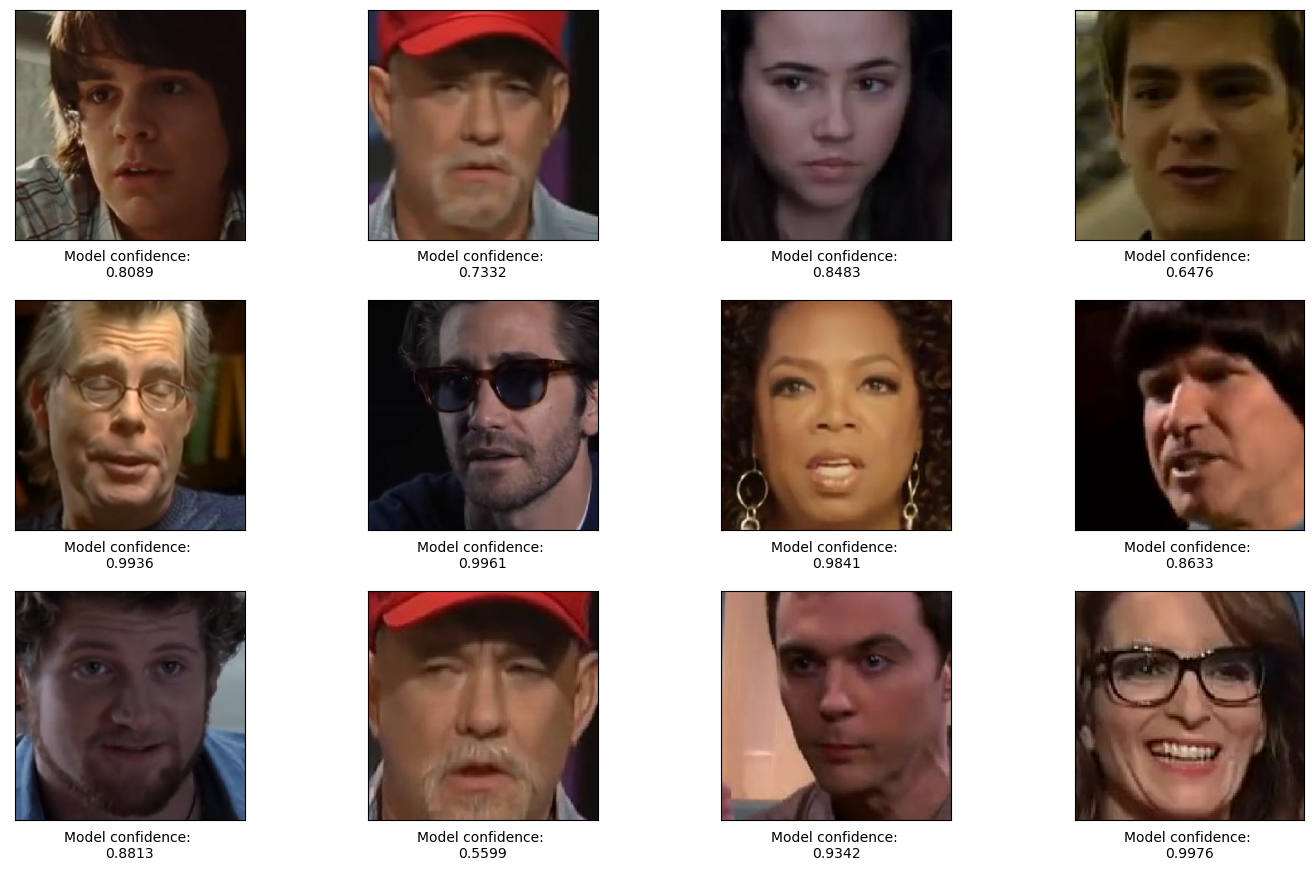

In [73]:
plotter(correct_real, correct_real_pred)

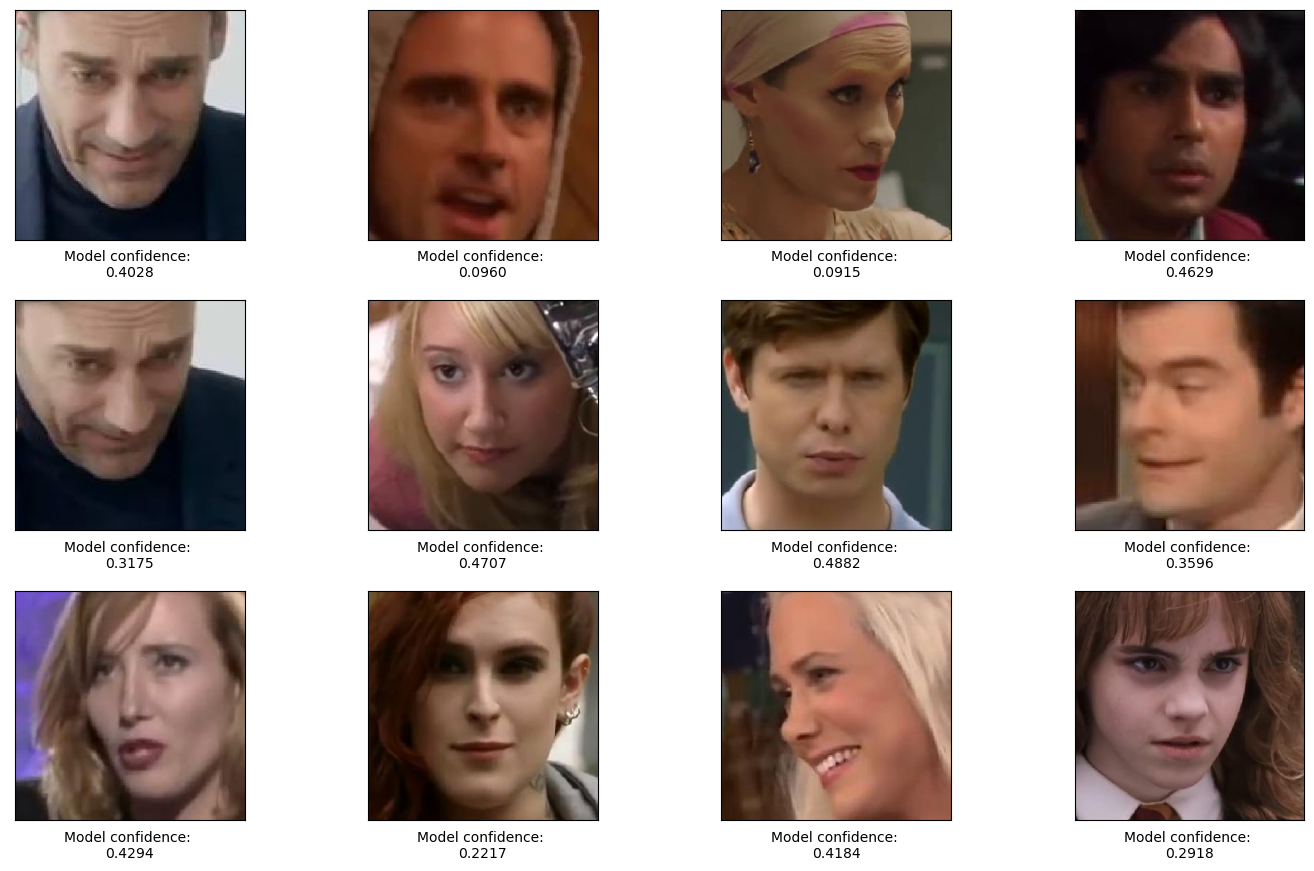

In [74]:
plotter(misclassified_real, misclassified_real_pred)

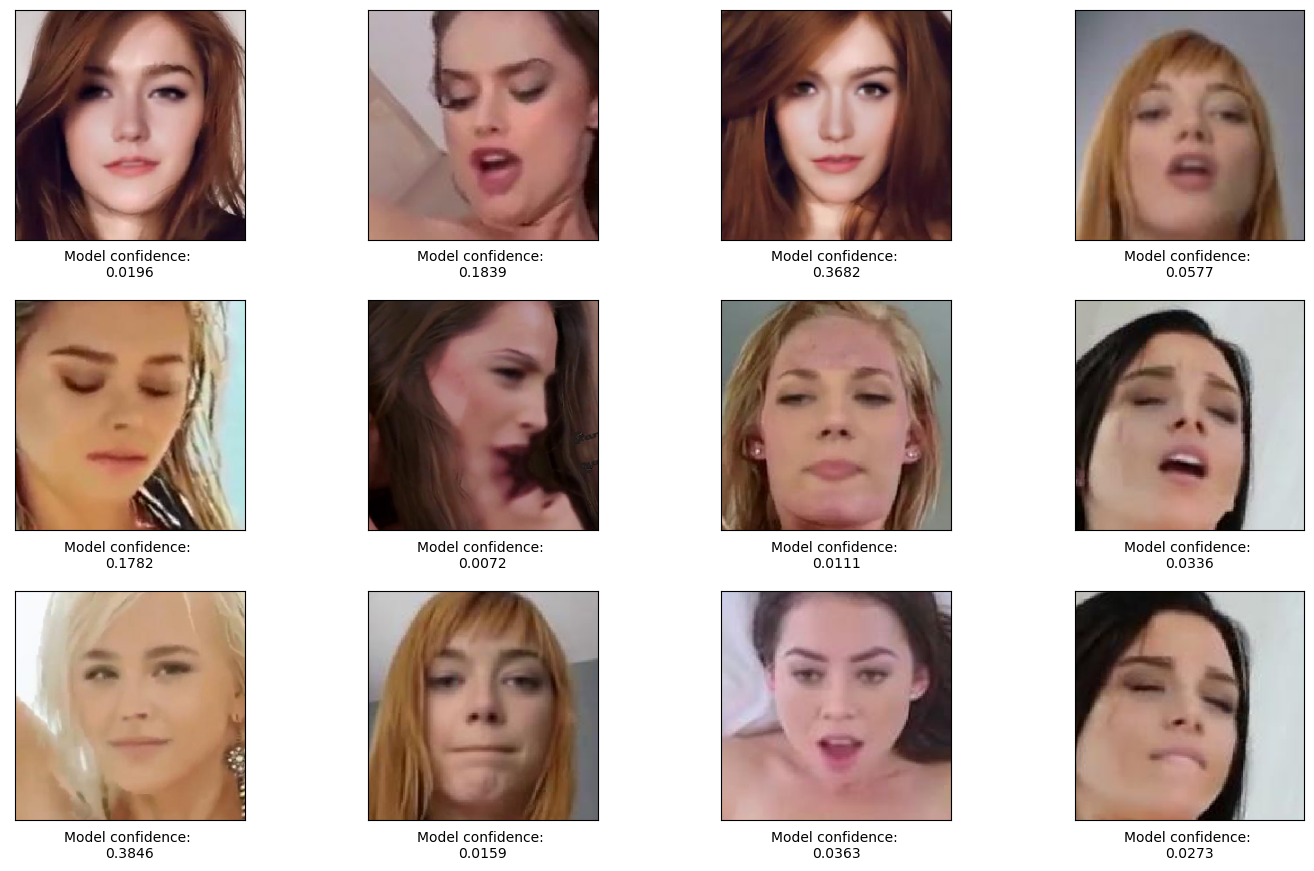

In [75]:
plotter(correct_deepfake, correct_deepfake_pred)

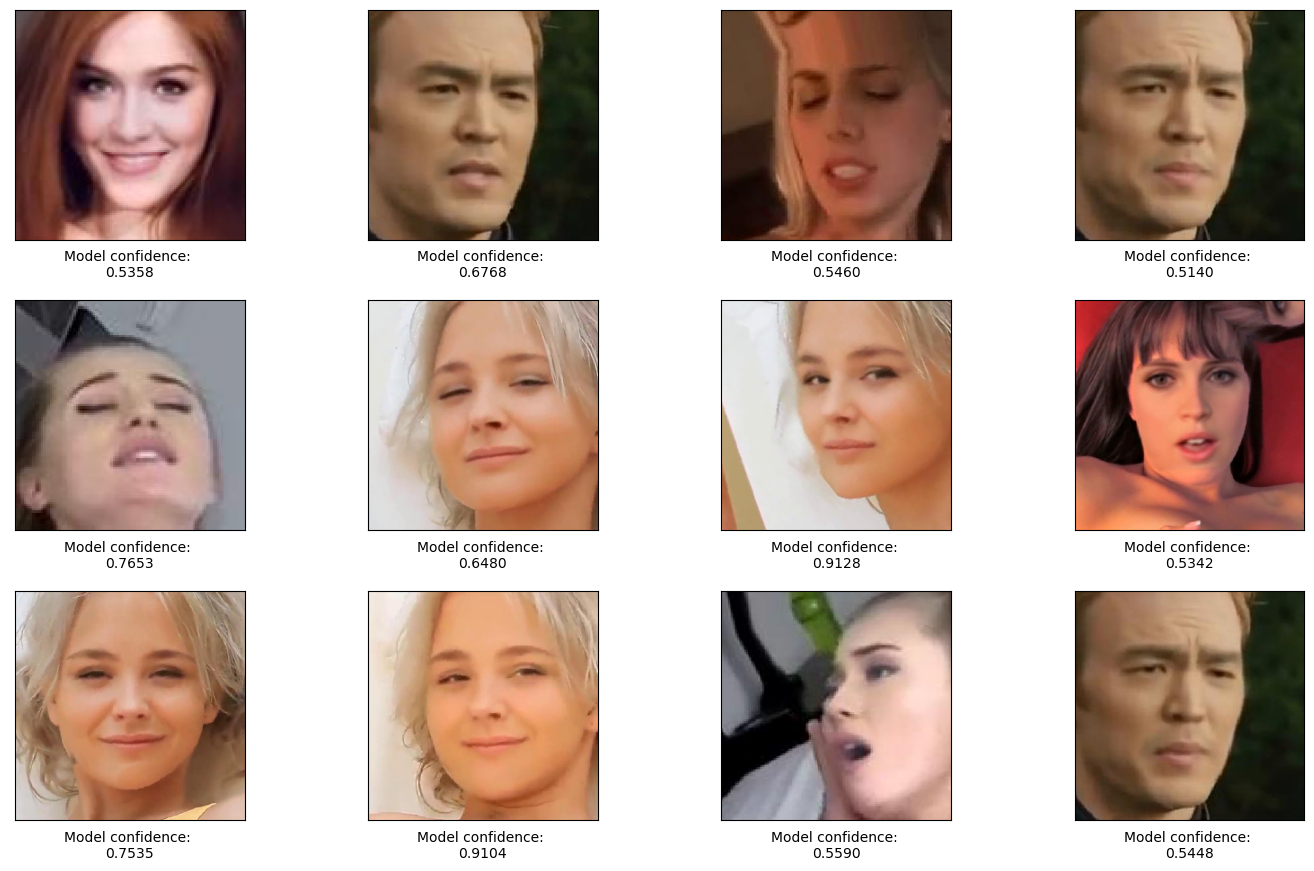

In [76]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)